In [229]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from plotnine import *
import os
import datetime
import pickle

In [194]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [195]:
os.chdir('/users/donnajenkins/desktop')
funda = pd.read_csv('output.csv')
funda['id'] = funda.groupby(['url'], sort=False).ngroup() + 1
funda.head()

,Unnamed: 0,city,Provincienaam,url,title,price,postalcode,livingspace,plotarea,constructionyear,...,rooms,bathroom,description,offerdate,selldate,duration,broker,garden_bool,constructionyear_category,id
0,0,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Oosteinderweg 373,335000,1432 AZ,116,195,1930,...,3,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,11 oktober 2021,2 maanden,Makelaarskantoor Mantel BV,False,Between 1900-1950,1
1,1,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/ap...,Koolwitjestraat 201,350000,1432 NT,85,1,2005,...,2,1,Comfortabel en ruim 2-kamer appartement met tu...,NaN,NaN,NaN,NaN,True,Between 2000-2010,2
2,2,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Legmeerdijk 241,875000,1432 KB,153,1,1957,...,5,2,ENGLISH SUMMARY BELOW Heerlijk vrij wonen omri...,NaN,NaN,NaN,NaN,True,Between 1950-2000,3
3,3,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Wissel 37,425000,1431 LN,130,129,1988,...,6,1,Woningzoekers opgelet! Wij hebben een unieke k...,NaN,NaN,NaN,NaN,True,Between 1950-2000,4
4,4,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Oosteinderweg 454,1425000,1432 BP,219,1,1989,...,5,2,Is deze fraaie vrijstaande villa met geweldige...,NaN,NaN,NaN,NaN,True,Between 1950-2000,5


In [196]:
#converting energylabel to 3 classes
funda['energylabel'] = funda['energylabel'].replace(['A+', 'A++','A+++', 'A++++','A+++++' ,'A' ], 'high')
funda['energylabel'] = funda['energylabel'].replace(['B','C','D'] , 'middle')
funda['energylabel'] = funda['energylabel'].replace(['E','F','G'] , 'low')

In [197]:
funda['housetype'] = pd.np.where(funda.housetype.str.contains("Eengezinswoning|eengezinswoning"), "Eengezinswoning",
    pd.np.where(funda.housetype.str.contains("appartement"), "Appartement",
    pd.np.where(funda.housetype.str.contains("Villa"), "Villa",
    pd.np.where(funda.housetype.str.contains("Herenhuis"), "Herenhuis",
    pd.np.where(funda.housetype.str.contains("Portiekflat"), "Portiekflat",
    pd.np.where(funda.housetype.str.contains("Bungalow"), "Bungalow", "Other"))))))

<ipython-input-197-d1e39e6c2e8f>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-197-d1e39e6c2e8f>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-197-d1e39e6c2e8f>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-197-d1e39e6c2e8f>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-197-d1e39e6c2e8f>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
<ipython-input-197-d1e39e6c2e8f>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy dir

In [198]:
funda.head()

,Unnamed: 0,city,Provincienaam,url,title,price,postalcode,livingspace,plotarea,constructionyear,...,rooms,bathroom,description,offerdate,selldate,duration,broker,garden_bool,constructionyear_category,id
0,0,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Oosteinderweg 373,335000,1432 AZ,116,195,1930,...,3,1,LET OP: WEGENS DE GROTE BELANGSTELLING IS HET ...,11 augustus 2021,11 oktober 2021,2 maanden,Makelaarskantoor Mantel BV,False,Between 1900-1950,1
1,1,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/ap...,Koolwitjestraat 201,350000,1432 NT,85,1,2005,...,2,1,Comfortabel en ruim 2-kamer appartement met tu...,NaN,NaN,NaN,NaN,True,Between 2000-2010,2
2,2,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Legmeerdijk 241,875000,1432 KB,153,1,1957,...,5,2,ENGLISH SUMMARY BELOW Heerlijk vrij wonen omri...,NaN,NaN,NaN,NaN,True,Between 1950-2000,3
3,3,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Wissel 37,425000,1431 LN,130,129,1988,...,6,1,Woningzoekers opgelet! Wij hebben een unieke k...,NaN,NaN,NaN,NaN,True,Between 1950-2000,4
4,4,Aalsmeer,Noord-Holland,https://www.funda.nl/koop/verkocht/aalsmeer/hu...,Oosteinderweg 454,1425000,1432 BP,219,1,1989,...,5,2,Is deze fraaie vrijstaande villa met geweldige...,NaN,NaN,NaN,NaN,True,Between 1950-2000,5


In [199]:
funda.drop('Unnamed: 0', inplace=True, axis=1)
funda.drop('title', inplace=True, axis=1)
funda.drop('postalcode', inplace=True, axis=1)
funda.drop('city', inplace=True, axis=1)
funda.drop('constructionyear', inplace=True, axis=1)
#funda.drop('energylabel', inplace=True, axis=1)
funda.drop('bathroom', inplace=True, axis=1)
funda.drop('description', inplace=True, axis=1)
funda.drop('offerdate', inplace=True, axis=1)
funda.drop('selldate', inplace=True, axis=1)
funda.drop('duration', inplace=True, axis=1)
funda.drop('broker', inplace=True, axis=1)
funda.drop('garden', inplace=True, axis=1)


In [200]:
funda.drop('url', inplace=True, axis=1)

In [201]:
funda.head()

,Provincienaam,price,livingspace,plotarea,energylabel,housetype,rooms,garden_bool,constructionyear_category,id
0,Noord-Holland,335000,116,195,low,Eengezinswoning,3,False,Between 1900-1950,1
1,Noord-Holland,350000,85,1,middle,Other,2,True,Between 2000-2010,2
2,Noord-Holland,875000,153,1,low,Eengezinswoning,5,True,Between 1950-2000,3
3,Noord-Holland,425000,130,129,high,Eengezinswoning,6,True,Between 1950-2000,4
4,Noord-Holland,1425000,219,1,middle,Villa,5,True,Between 1950-2000,5


In [202]:
funda.fillna(funda.mean())

,Provincienaam,price,livingspace,plotarea,energylabel,housetype,rooms,garden_bool,constructionyear_category,id
0,Noord-Holland,335000,116,195,low,Eengezinswoning,3,False,Between 1900-1950,1
1,Noord-Holland,350000,85,1,middle,Other,2,True,Between 2000-2010,2
2,Noord-Holland,875000,153,1,low,Eengezinswoning,5,True,Between 1950-2000,3
3,Noord-Holland,425000,130,129,high,Eengezinswoning,6,True,Between 1950-2000,4
4,Noord-Holland,1425000,219,1,middle,Villa,5,True,Between 1950-2000,5
...,...,...,...,...,...,...,...,...,...,...
101720,Overijssel,575000,120,333,middle,Eengezinswoning,6,True,Between 1900-1950,101721
101721,Overijssel,300000,101,109,high,Eengezinswoning,4,True,Between 2000-2010,101722
101722,Overijssel,310000,121,161,high,Eengezinswoning,6,True,Between 2000-2010,101723
101723,Overijssel,300000,141,152,middle,Eengezinswoning,5,False,Between 1950-2000,101724


## Creating train test and validation splits

In [203]:
class TrainTestSplitter(object):
    '''Class to perform the split of the data into train, test, and validation.
    '''
    def __init__(self, train_frac=0.8, validation_frac=0.2, seed=1234):
        self.train_frac = train_frac
        self.validation_frac = validation_frac
        self.seed = seed
    
    def calculate_statistics(self):
        statistics = {}
        for i in ['train_set', 'test_set', 'validation_set']:
            split_stats = {}
            default_count = (getattr(self, i))
            n_high_price = default_count.loc[default_count['price'] > 500000].shape[0]
            n_low_price = default_count.loc[default_count['price'] < 100000].shape[0]
            split_stats['percentage_high_Price'] = split_stats['Percentage_high_price'] = n_high_price/self.total_high_Price * 100
            split_stats['percentage_low_Price'] = split_stats['Percentage_low_price'] = n_low_price/self.total_high_Price * 100
            statistics[i] = split_stats
        self.split_statistics = statistics

    def split_train_test(self, df):
        print("Generating the train/validation/test splits...")
        self.total_high_Price = df.loc[df['price'] > 500000].shape[0]
        self.total_low_Price = df.loc[df['price'] < 100000].shape[0]
        self.train_set = df.sample(frac=self.train_frac, random_state=self.seed)
        self.test_set = df.loc[lambda x: ~x.id.isin(self.train_set.id)].reset_index(drop=True)
        self.validation_set = self.train_set.sample(frac=self.validation_frac).reset_index(drop=True)
        self.train_set = self.train_set.loc[lambda x: ~x.id.isin(self.validation_set.id)].reset_index(drop=True)
        print("calculating the statistics...")
        self.calculate_statistics()
        print("split completed")

In [204]:
fitting_splits = TrainTestSplitter()

In [205]:
fitting_splits.split_train_test(funda)

Generating the train/validation/test splits...
calculating the statistics...
split completed


In [206]:
fitting_splits.test_set.shape

(20345, 10)

In [207]:
fitting_splits.split_statistics

{'train_set': {'percentage_high_Price': 64.1167192429022,
  'Percentage_high_price': 64.1167192429022,
  'percentage_low_Price': 0.17875920084121977,
  'Percentage_low_price': 0.17875920084121977},
 'test_set': {'percentage_high_Price': 20.047318611987382,
  'Percentage_high_price': 20.047318611987382,
  'percentage_low_Price': 0.05783385909568874,
  'Percentage_low_price': 0.05783385909568874},
 'validation_set': {'percentage_high_Price': 15.835962145110411,
  'Percentage_high_price': 15.835962145110411,
  'percentage_low_Price': 0.05783385909568874,
  'Percentage_low_price': 0.05783385909568874}}

# Dummification and scaling

In [208]:
# 1. fit a one hot encoder transformer to the TRAIN SET. The object we obtain will be reused later, to transform our data
# note: it is important that these transformers are fitted only on the train data.
one_hot_encoder = OneHotEncoder() # one hot encoder is a class instance
one_hot_encoder.fit(fitting_splits.train_set[[ 'energylabel' , 'constructionyear_category','Provincienaam', 'garden_bool', 'housetype']]) # we can fit the encoder instance on the columns that need to be transformed.

OneHotEncoder()

In [209]:
# let's check what the encoded did
one_hot_encoder.categories_ # after we fit the encoder, the instance learns which values are present in each data column.
encoded_names = one_hot_encoder.get_feature_names() # with this method we can retrieve the names of the new dummy columns that have been computed
encoded_names
encoded_categories = one_hot_encoder.transform(fitting_splits.train_set[[ 'energylabel' , 'constructionyear_category', 'Provincienaam', 'garden_bool', 'housetype']]).toarray() # at this point, we can use the fitted encoder to transform any array with a sex and marriage column; not just the training set, but also the validation or test set. The encoder will take that array of shape (M,2) and transform it to an array of shape (M, N), where N is the total number of distinct possible values for the encoded features. The values of the new array will be either 0 or 1, encoding whether that value of the feature applies to the row.
df_encoded = pd.DataFrame(encoded_categories)
df_encoded.columns = encoded_names
df_encoded

[array(['high', 'low', 'middle'], dtype=object),
 array(['After 2010', 'Before 1600', 'Between 1600-1700',
        'Between 1700-1800', 'Between 1800-1900', 'Between 1900-1950',
        'Between 1950-2000', 'Between 2000-2010'], dtype=object),
 array(['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen',
        'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel',
        'Utrecht', 'Zeeland', 'Zuid-Holland'], dtype=object),
 array([False,  True]),
 array(['Appartement', 'Bungalow', 'Eengezinswoning', 'Herenhuis', 'Other',
        'Portiekflat', 'Villa'], dtype=object)]

array(['x0_high', 'x0_low', 'x0_middle', 'x1_After 2010',
       'x1_Before 1600', 'x1_Between 1600-1700', 'x1_Between 1700-1800',
       'x1_Between 1800-1900', 'x1_Between 1900-1950',
       'x1_Between 1950-2000', 'x1_Between 2000-2010', 'x2_Drenthe',
       'x2_Flevoland', 'x2_Friesland', 'x2_Gelderland', 'x2_Groningen',
       'x2_Limburg', 'x2_Noord-Brabant', 'x2_Noord-Holland',
       'x2_Overijssel', 'x2_Utrecht', 'x2_Zeeland', 'x2_Zuid-Holland',
       'x3_False', 'x3_True', 'x4_Appartement', 'x4_Bungalow',
       'x4_Eengezinswoning', 'x4_Herenhuis', 'x4_Other', 'x4_Portiekflat',
       'x4_Villa'], dtype=object)

,x0_high,x0_low,x0_middle,x1_After 2010,x1_Before 1600,x1_Between 1600-1700,x1_Between 1700-1800,x1_Between 1800-1900,x1_Between 1900-1950,x1_Between 1950-2000,...,x2_Zuid-Holland,x3_False,x3_True,x4_Appartement,x4_Bungalow,x4_Eengezinswoning,x4_Herenhuis,x4_Other,x4_Portiekflat,x4_Villa
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65099,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [211]:
# after we have generated the dummy columns, we want to drop the original columns from the training data, and replace them with the dummy columns
train_set = fitting_splits.train_set.drop([ 'energylabel' , 'constructionyear_category', 'Provincienaam', 'garden_bool', 'housetype'], axis=1)
train_set = pd.concat([train_set, df_encoded], axis=1)
train_set

,price,livingspace,plotarea,rooms,id,x0_high,x0_low,x0_middle,x1_After 2010,x1_Before 1600,...,x2_Zuid-Holland,x3_False,x3_True,x4_Appartement,x4_Bungalow,x4_Eengezinswoning,x4_Herenhuis,x4_Other,x4_Portiekflat,x4_Villa
0,435000,114,108,5,25167,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,995000,236,425,8,52220,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,375000,129,121,5,96559,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,189500,95,360,5,88863,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,240000,83,212,4,72532,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65099,275000,128,140,5,64005,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65100,345000,147,161,5,17872,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65101,325000,119,120,5,99138,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65102,244500,99,152,5,95365,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [212]:
# now we fit the StandardScaler, in order to standardize all the features
standard_scaler = StandardScaler()
standard_scaler.fit(train_set)
# the above standard scaler, when apply to a dataset with the same columns as the train set, will scale all the numerical features and return a numpy array
standard_scaler.transform(train_set)

StandardScaler()

array([[ 0.15502256, -0.00973054, -0.20198561, ..., -0.24785502,
        -0.14873145, -0.15750542],
       [ 2.43881939,  2.59102597,  1.75710225, ..., -0.24785502,
        -0.14873145,  6.34898769],
       [-0.08966995,  0.3100346 , -0.12164447, ..., -0.24785502,
        -0.14873145, -0.15750542],
       ...,
       [-0.29358038,  0.09685784, -0.12782456, ..., -0.24785502,
        -0.14873145, -0.15750542],
       [-0.62187618, -0.32949569,  0.06993825, ..., -0.24785502,
        -0.14873145, -0.15750542],
       [ 0.66479864,  1.14142398,  1.92396462, ..., -0.24785502,
        -0.14873145, -0.15750542]])

In [213]:
class DataPreparer(object):
    def __init__(self, one_hot_encoder, standard_scaler):
        self.one_hot_encoder = one_hot_encoder
        self.standard_scaler = standard_scaler

    def dummify(self, df):
        vars_to_encode = ['energylabel' , 'constructionyear_category', 'Provincienaam', 'garden_bool', 'housetype']
        df_to_encode = df[vars_to_encode]
        df_encoded = self.one_hot_encoder.transform(df_to_encode).toarray()
        df_encoded = pd.DataFrame(df_encoded)
        df_encoded.columns = self.one_hot_encoder.get_feature_names()
        # add the encoded columns and drop the original columns
        df = df.drop(vars_to_encode,axis=1)
        df = pd.concat([df, df_encoded], axis=1)
        return df

    def scale(self, df):
        cols = df.columns
        df = self.standard_scaler.transform(df)
        df = pd.DataFrame(df)
        df.columns = cols
        return df

    def prepare_data(self, df):
        df = df.reset_index(drop=True)
        # first dummify the data
        df = self.dummify(df)
        # then scale it
        df = self.scale(df)
        return df

In [214]:
data_preparer = DataPreparer(one_hot_encoder, standard_scaler)
data_preparer.prepare_data(fitting_splits.train_set).head()
data_preparer.prepare_data(fitting_splits.validation_set).head()

,price,livingspace,plotarea,rooms,id,x0_high,x0_low,x0_middle,x1_After 2010,x1_Before 1600,...,x2_Zuid-Holland,x3_False,x3_True,x4_Appartement,x4_Bungalow,x4_Eengezinswoning,x4_Herenhuis,x4_Other,x4_Portiekflat,x4_Villa
0,0.155023,-0.009731,-0.201986,0.396044,-0.880173,-0.556225,1.743333,-1.032825,-0.349892,-0.019988,...,-0.498084,1.590842,-1.590842,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
1,2.438819,2.591026,1.757102,2.465500,0.040873,1.797833,-0.573614,-1.032825,-0.349892,-0.019988,...,-0.498084,-0.628598,0.628598,-0.621897,-0.118464,-1.158282,-0.17766,-0.247855,-0.148731,6.348988
2,-0.089670,0.310035,-0.121644,0.396044,1.550438,1.797833,-0.573614,-1.032825,2.858021,-0.019988,...,-0.498084,-0.628598,0.628598,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
3,-0.846178,-0.414766,1.355397,0.396044,1.288420,-0.556225,1.743333,-1.032825,-0.349892,-0.019988,...,-0.498084,-0.628598,0.628598,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
4,-0.640228,-0.670579,0.440744,-0.293775,0.732415,-0.556225,1.743333,-1.032825,-0.349892,-0.019988,...,-0.498084,1.590842,-1.590842,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505


,price,livingspace,plotarea,rooms,id,x0_high,x0_low,x0_middle,x1_After 2010,x1_Before 1600,...,x2_Zuid-Holland,x3_False,x3_True,x4_Appartement,x4_Bungalow,x4_Eengezinswoning,x4_Herenhuis,x4_Other,x4_Portiekflat,x4_Villa
0,-0.032575,-0.734532,-0.356488,-0.983594,-0.260876,-0.556225,1.743333,-1.032825,-0.349892,-0.019988,...,-0.498084,-0.628598,0.628598,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
1,-0.089670,-0.308178,0.879530,0.396044,1.637527,-0.556225,-0.573614,0.968218,-0.349892,-0.019988,...,2.007693,-0.628598,0.628598,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
2,-0.701401,-0.478719,0.150279,-0.293775,0.500664,-0.556225,-0.573614,0.968218,-0.349892,-0.019988,...,-0.498084,-0.628598,0.628598,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
3,-0.048888,0.842977,1.058752,1.085863,0.394679,1.797833,-0.573614,-1.032825,-0.349892,-0.019988,...,-0.498084,-0.628598,0.628598,-0.621897,-0.118464,0.863347,-0.17766,-0.247855,-0.148731,-0.157505
4,-0.293580,-0.905073,-0.863255,-1.673412,-0.902064,1.797833,-0.573614,-1.032825,-0.349892,-0.019988,...,-0.498084,1.590842,-1.590842,-0.621897,-0.118464,-1.158282,-0.17766,-0.247855,6.723527,-0.157505


# Modeling with SVC 

In [244]:
# get the transformed train set
train_set_transformed = data_preparer.prepare_data(fitting_splits.train_set)
X_train = train_set_transformed.drop(['price', 'id'], axis=1) # need to drop the target! otherwise data leakage
y_train = fitting_splits.train_set['price'] # take it from the original untransformed dataset
# create the model instance
regr = RandomForestRegressor(n_estimators=20, random_state=0)
# fit the model instance on X_train
RegFit = regr.fit(X=X_train, y=y_train.values.ravel())

In [245]:
# now we can use the fitted simple_SVC model to predict on the test dataset!
X_test = data_preparer.prepare_data(fitting_splits.test_set).drop(['price', 'id'], axis=1)
y_test = fitting_splits.test_set['price']

y_hat_test = regr.predict(X_test)
# the result is a vector of predicted classes for the observations in validation, which the model was not trained on!
pd.Series(y_hat_test)

0         478025.0
1        1397650.0
2        1049950.0
3         978250.0
4         466800.0
           ...    
20340     716750.0
20341     236825.0
20342     256800.0
20343     298075.0
20344     335875.0
Length: 20345, dtype: float64

In [237]:
# we can already see that the model is underpredicting the minority class and overpredicting on the majority class
pd.Series(y_hat_test).value_counts()
fitting_splits.test_set['price'].value_counts()

304008.330539    10
361874.741426    10
349598.169829    10
272599.025963     9
320753.667854     9
                 ..
181800.000000     1
509350.000000     1
441450.000000     1
374100.000000     1
637875.000000     1
Length: 14944, dtype: int64

275000     744
325000     726
350000     634
250000     585
375000     568
          ... 
2195000      1
253500       1
679500       1
499332       1
638000       1
Name: price, Length: 1041, dtype: int64

In [238]:
#https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Mean Absolute Error: 72110.8674420642
Mean Squared Error: 17051995883.374367
Root Mean Squared Error: 130583.29098079266


Text(0.5, 1.0, 'y-test and y-predicted data')

Text(0.5, 0, 'X-axis')

Text(0, 0.5, 'Y-axis')

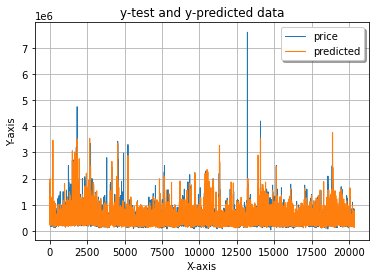

In [249]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="price")
plt.plot(x_ax, y_hat_test, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Hyper parameter tuning